In [0]:
!unrar x "/content/drive/My Drive/Dogs vs Cats.rar" "/content"

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255 , shear_range = 0.2 , zoom_range =0.2 , horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/Dogs vs Cats/training_set' , target_size = (128,128) , batch_size=32 , class_mode='categorical')
test_set = test_datagen.flow_from_directory('/content/Dogs vs Cats/test_set' , target_size=(128,128) , batch_size=32, class_mode = 'categorical')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [0]:
classifier = Sequential()
classifier.add(Conv2D(64 , (3 , 3), input_shape=(128,128,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(64 , (3 , 3) , activation='relu'))
#no of filters is 64 , size of filter matrix is 3 x 3 
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(128 , activation = 'relu'))
# classifier.add(Dropout(0.1))
# classifier.add(Dense(128 , activation = 'relu'))
classifier.add(Dense(2 , activation = 'softmax'))
classifier.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics =['accuracy'])

In [13]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               7372928   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [0]:
classifier.fit_generator(training_set ,steps_per_epoch=(8000/100), epochs = 20 , validation_data = test_set , validation_steps=(2000/100))

In [0]:
classifier.save("/content/doggy or cat.h5")

In [0]:
from keras.models import load_model
model = load_model("/content/doggy or cat.h5")

In [0]:
https://drive.google.com/file/d/10LXEJupgUaMPe1asGvWlghmJ8VhZt9SK/view?usp=sharing

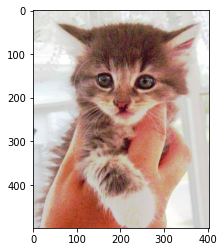

In [34]:
image_path = '/content/drive/My Drive/Dogs vs Cats/training_set/cats/cat.100.jpg'
import matplotlib.pyplot as plt
img = plt.imread(image_path)
plt.imshow(img)

In [35]:

# loading and predicting single image using keras
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(image_path , target_size=(128,128))
# converting to array and including 3rd dimension for rgb
test_image = image.img_to_array(test_image)
# including dimension for batch
test_image = np.expand_dims(test_image ,axis =0 )
classifier.predict(test_image)

array([[1., 0.]], dtype=float32)

In [36]:
training_set.class_indices

{'cats': 0, 'dogs': 1}